<a href="https://colab.research.google.com/github/harry-rendell/MLworkshop/blob/main/workshop_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set-up: Run the following cell to clone the repository to your Colab filespace.

In [ ]:
!git clone https://github.com/harry-rendell/MLworkshop.git
import sys
sys.path.append('./MLworkshop')

fatal: destination path 'MLworkshop' already exists and is not an empty directory.


## Tips!
* Pass your cursor over a function to see what it does.

# Introduction
---
We are going to build and train a convolutional neural network to classify the MNIST dataset. This dataset contains 60,000 training and 10,000 test images of handwritten digits from 0 to 9. It is a similar dataset to the one used in the first workshop but it is higher resolution (28x28).

In [ ]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
# Keras import(s)
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, MaxPooling2D
# Custom imports
from funcs.plotting import plot_classifications, plot_training, plot_data, plot_latent_space

# Load in data

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/x_train.max() # Normalise data so pixel values are between 0 and 1
x_test = x_test/x_test.max()

# Add a new axis to the end. This axis is used to specifiy the RGB channel.
# Although this axis is unnecessary since we are working with grayscale images, it is required to keep the shapes consistent.
x_train = x_train[:,:,:,np.newaxis]
x_test  = x_test [:,:,:,np.newaxis]

input_shape = (28,28,1)
n_classes = 10

# Plot the data
---
### Let's take a look at the dataset

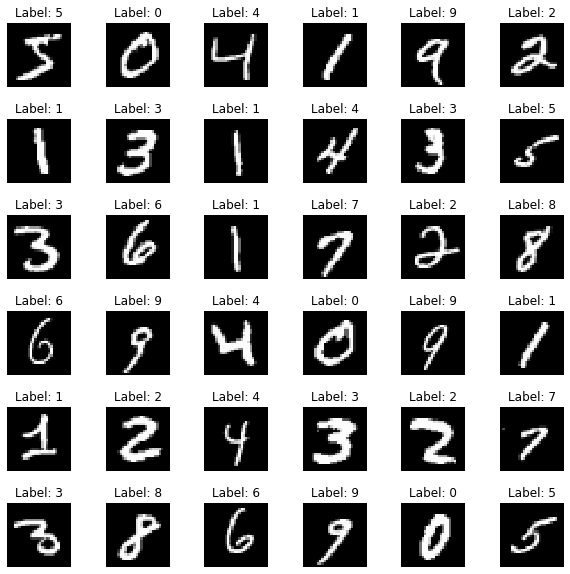

In [ ]:
plot_data(x_train, y_train)

# Making your model
---
### This is the basic structure of constructing a convolutional neural network using Keras
> ```
> Line 1: i = Input(shape)
> Line 2: x = Conv2D(number_of_filters, kernel_size, activation)(i)
> Line 3: x = MaxPooling2D(pool_size)(x)
> Line 4: x = Conv2D(number_of_filters, kernel_size, activation)(x)
> ...
> Line 5: x = Flatten()(x)
> Line 6: o = Dense(n_classes, activation)(x)
>
> Line 7: mymodel = Model(i, o, name)
> Line 8: mymodel.summary()

* Line 1: We set the input of the model using the shape of our input. Since we are using 28x28 images in the training data, out input shape is (28,28). You can use the ```input_shape``` parameter defined earlier.
* Line 2: Here we create the first convolutional layer. We need to set the number of filters, kernel_size and activation.
* Line 3: Use the MaxPooling2D function which downsamples the image. We don't necessarily need this layer but it helps reduce the size of the network, and therefore speeds up training.
* Line 4: We can add more convolutional layers, provided we pass the previous layer to the new layer by putting (x) at the end as before. You may add as many Conv2D/MaxPooling2D layers as you wish after this. However, as both Conv2D/MaxPooling2D reduce the size of the image, you may get an error if you add too many because your output becomes too small!
* Line 5: Flatten the output from 2D to 1D so we can use a Dense layer next.
* Line 6: We need to finish with a Dense layer rather than a Conv2D layer because the output shape needs to be 1D to match the shape of the label data (y_train), which is also 1D. Also, we need to use an activation which gives a probability for how likely the given input is a particular number, a sensible choice would be activation='softmax' just like in workshop 1.
* Line 7: We construct the model using the ```Model()``` function. We pass the input and output. You can also name the model anything you like, e.g. name = 'My first model!'
* Line 8: Prints a summary of our model

In [ ]:
### Use the structure above to make your model here


# Training your model
---
### Now you have defined your model, use the structure below to compile and train it.
> ```
> Line 9: mymodel.compile(...)
> Line 10: mymodel_history = mymodel.fit(...)


* Line 9: Here we compile the model using ```.compile()```. We need to pass the following: 
    * optimizer='adam'
    * loss='sparse_categorical_crossentropy'
    * metrics='accuracy'


* Line 10: Train the model using ```.fit()```. We need to pass a few things here:
    * x - training images
    * y - training labels
    * epochs - how long to train for. ~10 is a good start.
    * batch_size - how many images to group up for each training step. ~128 is sensible.
    * validation_split - what fraction of the training data gets used as test data for monitoring the accuracy during training. A sensible choice is between 0.1 and 0.3
    * verbose - Set this to True if you wish to see the progress of training. Otherwise set to False.

In [ ]:
### Use the structure above to compile and train your model


# Plot progress of training
---

### Now you have defined your model, use the structure below to compile and train it.
> ```
> Line 11: plot_training(...)
> Line 12: mymodel.evaluate(...)


* Line 11: Pass the output from Line 9 to my custom function plot_training() to see how the training progressed over time.

* Line 12: Evaluate the model on the test data to find the final accuracy. Note that this function returns two numbers, loss and accuracy, but we are only interested in the accuracy at this point.

In [ ]:
### Use the structure above to plot the training and evaluate the test accuracy


# Plot classifications
---
### Let's plot some of the test data along with the predicted classifcations from the network.
> ```
> Line 13: predicted = mymodel.predict(x_test).argmax(axis=-1)
> Line 14: plot_classifications(x_test, y_test, predicted)


* Line 13: Ask the network to predict the labels of the test data. Then choose the one with the highest probability (argmax)

* Line 14: Use my custom function to plot a grid of test data with their true and predicted labels. Note, misclassifications will appear in red.

In [ ]:
### Use the structure above to predict and plot the classifications of the test data


# Let's take a peek inside the network...
---
Neural networks are often consisdered 'Black Boxes' in the sense that it's incredibly hard to understand how the network is able to make the predictions it does. This is because there are thousands of connections between layers and it is not obvious which connections help classify ones and which classify sixes, for example.

However, if we introduce a small Dense layer (with only 2 nodes), then we can look at the activations of these nodes when we pass different numbers through, and plot them on an x-y plane.

To do this, copy your network from lines 1-10 but this time add a Dense layer with 2 nodes in between lines 5 and 6. Set the activation='None' (this is so that we can have negative outputs; relu only allows positive).

In [ ]:
### Copy your code corresponding to lines 1-10, then add a Dense layer described above


Your accuracy should have gone down compared to your network from before. Why is this?

# Plotting the activations in the bottle-neck layer
---
### We will need to define a new model whose output is the Dense(2) layer of the previous model. We can do this using the following:
> ```
> Line 15: new_model = Model(inputs = mymodel.input, outputs = mymodel.layers[-2].output)
> Line 16: latent_output = new_model.predict(x_train)

Then we can plot using the following:

> ```
> Line 17: plot_latent_space(latent_output, y_train, n_classes)

Note, we don't need to retrain this new model as it will intiate in the same state as mymodel, which has already been trained!

In [ ]:
### Use the structure above to define a new model, find the activations in the Dense(2) layer, and plot it.
